# EA Stock Closing Prices (Linear Regression)

### Utilize Scikit-Learn, Matplotlib, Pandas, NumPy

In [1]:
import pandas as pd

stocks = pd.read_csv('/Users/faris/Downloads/EA.csv',header=None)
stocks.rename(columns={0:'Date', 
                      1:'Open',
                      2:'High',
                      3:'Low',
                      4:'Close',
                      5:'Adj Close',
                      6:'Volume'},inplace=True)
stocks = stocks.drop([0])
stocks[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']] = stocks[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].apply(pd.to_numeric)
stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume
1,1989-09-20,0.0,0.531250,0.515625,0.515625,0.511700,15396800
2,1989-09-21,0.0,0.507813,0.500000,0.500000,0.496193,6224000
3,1989-09-22,0.0,0.507813,0.500000,0.500000,0.496193,2041600
4,1989-09-25,0.0,0.476563,0.468750,0.468750,0.465181,3072000
5,1989-09-26,0.0,0.476563,0.468750,0.468750,0.465181,888000


In [2]:
stocks.describe()

,Open,High,Low,Close,Adj Close,Volume
count,8233.000000,8233.000000,8233.000000,8233.000000,8233.000000,8.233000e+03
mean,40.661248,41.263772,40.061442,40.672382,40.388914,4.499655e+06
std,39.613560,40.033235,39.135005,39.589489,39.349881,3.441280e+06
min,0.000000,0.453125,0.382813,0.398438,0.395405,0.000000e+00
25%,9.406250,9.656250,9.187500,9.437500,9.365651,2.480400e+06
50%,24.870001,25.584999,24.250000,24.885000,24.695553,3.678700e+06
75%,56.549999,57.360001,55.820000,56.610001,56.179031,5.520400e+06
max,149.059998,151.259995,147.710007,148.970001,148.032883,4.815280e+07


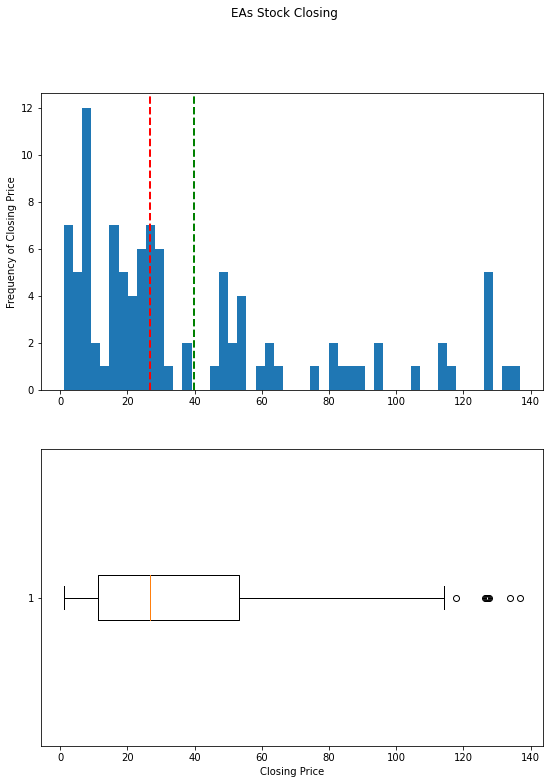

In [3]:
from matplotlib import pyplot as plt

fig, gph = plt.subplots(2, 1, figsize = (9,12))

stock = stocks.sample(n=100)

gph[0].hist(stock['Close'], bins=50)
gph[0].set_ylabel('Frequency of Closing Price')

gph[0].axvline(stock['Close'].mean(), color='green', linestyle='dashed', linewidth=2)
gph[0].axvline(stock['Close'].median(), color='red', linestyle='dashed', linewidth=2)

gph[1].boxplot(stock['Close'], vert=False)
gph[1].set_xlabel('Closing Price')

fig.suptitle('EAs Stock Closing')

plt.show()

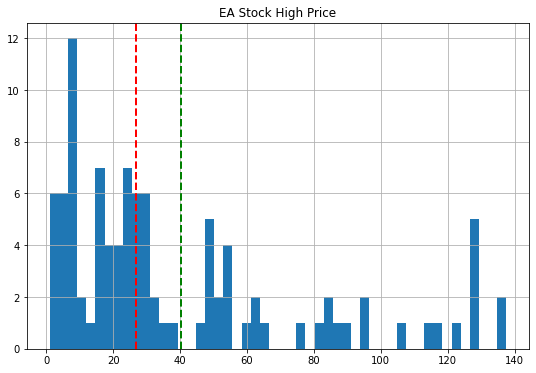

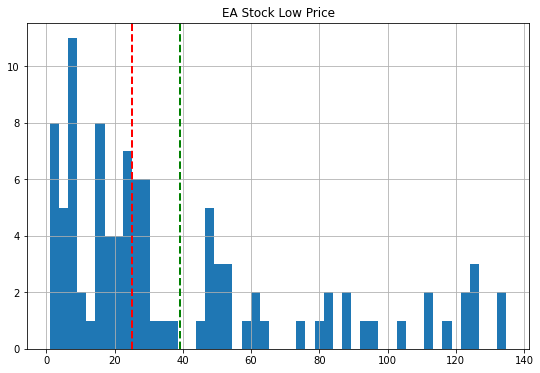

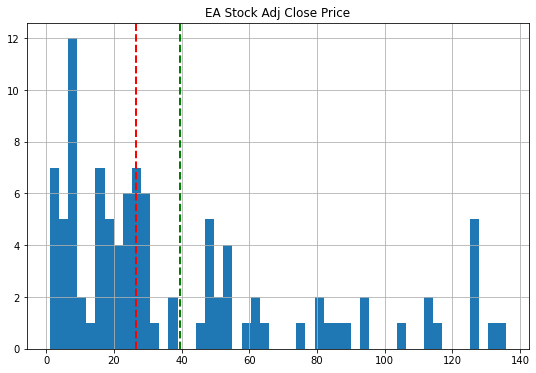

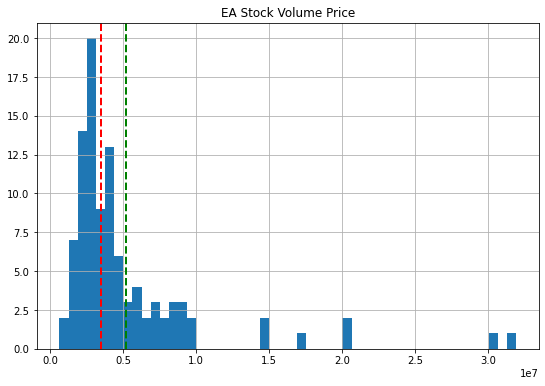

In [4]:
feature = ['High','Low', 'Adj Close', 'Volume']

for i in feature:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    f = stock[i]
    f.hist(bins=50,ax = ax)
    ax.axvline(f.mean(), color='green', linestyle='dashed', linewidth=2)
    ax.axvline(f.median(), color='red', linestyle='dashed', linewidth=2)
    ax.set_title('EA Stock ' + i + ' Price')
plt.show()

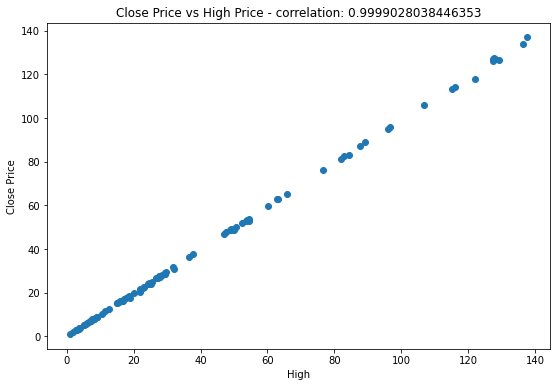

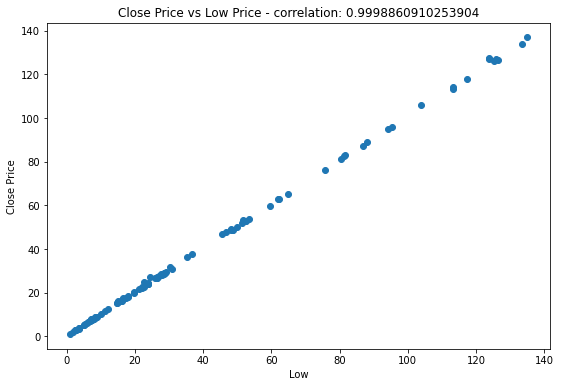

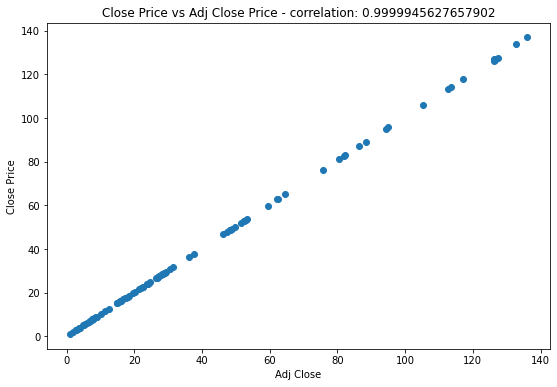

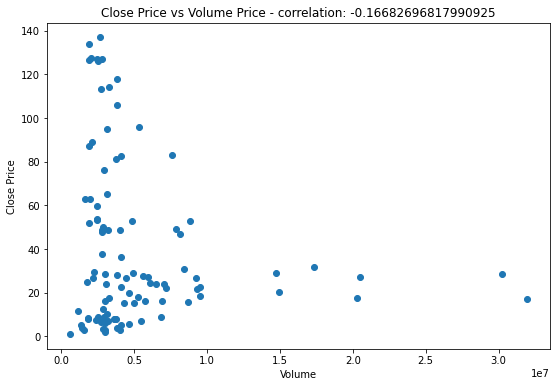

In [5]:
for i in feature:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    f = stock[i]
    correlation = f.corr(stock['Close'])
    plt.scatter(x=f, y=stock['Close'])
    plt.xlabel(i)
    plt.ylabel('Close Price')
    ax.set_title('Close Price vs ' + i + ' Price - correlation: ' + str(correlation))
plt.show()

In [6]:
X, y = stock[['High','Low', 'Adj Close', 'Volume']].values, stock['Close'].values
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[[2.55625000e+01 2.26250000e+01 2.46856270e+01 1.81000000e+06]
 [9.12500000e+00 8.56250000e+00 8.80743300e+00 2.91240000e+06]
 [1.71399990e+01 1.65599990e+01 1.67217220e+01 3.19209000e+07]
 [1.04687500e+00 1.02343800e+00 1.03115200e+00 6.20800000e+05]
 [2.97199990e+01 2.90100000e+01 2.92307570e+01 2.26060000e+06]
 [2.96875000e+00 2.84375000e+00 2.84536000e+00 1.54240000e+06]
 [7.68750000e+00 7.50000000e+00 7.50492700e+00 2.41760000e+06]
 [5.01100010e+01 4.86399990e+01 4.82697030e+01 4.06960000e+06]
 [1.60800000e+01 1.58400000e+01 1.58881160e+01 5.72610000e+06]
 [1.16040001e+02 1.13239998e+02 1.13419899e+02 3.29390000e+06]]

Labels:
[ 24.875      8.875     16.85       1.039063  29.455      2.867188
   7.5625    48.639999  16.01     114.290001]


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 85 rows
Test Set: 15 rows


In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)
print (model)

LinearRegression()


In [9]:
import numpy as np

predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [  8.  27.  17.  10.  18.  23.   4.   8.   3. 118.]
Actual labels   :  [  7.75      26.495001  16.85      10.28125   18.209999  22.790001
   3.75       8.25       2.65625  117.93    ]


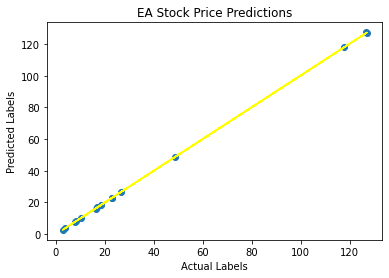

In [10]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('EA Stock Price Predictions')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='Yellow')
plt.show()

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 0.048173891234954684
RMSE: 0.2194855148636344
R2: 0.9999752649808861
